# How to use the guppy gym

- The most important environment class to use is `ConfigurableGuppyEnv`
- Do not subclass `GuppyEnv` directly

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import robofish.gym_guppy

## Default env
- per default one robot and one guppy is added

In [2]:
env = robofish.gym_guppy.envs.ConfigurableGuppyEnv()
type(env.robot), type(next(env.guppies))

(robofish.gym_guppy.guppies._robot.PolarCoordinateTargetRobot,
 robofish.gym_guppy.guppies._couzin_guppies.AdaptiveCouzinGuppy)

## Configuration

In [3]:
num_guppies = 3

env = robofish.gym_guppy.envs.ConfigurableGuppyEnv(
    # you can set guppy_type and robot_type either as str or class
    guppy_type="PerturbedAdaptiveCouzinGuppy",
    num_guppies=num_guppies,
    # args get passed to the constructor and get merged with
    # arguments that `ConfigurableGuppyEnv` will set automatically
    # such as world and world_bounds
    guppy_args={"zone_radius_std": 0.2},
    robot_type=robofish.gym_guppy.guppies.TurnSpeedRobot,
    robot_args={},
    # robot_pose_rng determines the initial pose distribution
    # default is normal, you can either use "robot_pose_sample_uniform"
    # for uniform sampling or pass a function
    # `lambda bounds: np.zeros((3,))` will place the robot
    # deterministically in the center
    robot_pose_rng=lambda bounds: np.zeros((3,)),
    guppy_pose_rng=lambda num_guppies, bounds: np.zeros((num_guppies, 3)),
)

robot = env.robot
guppies = list(env.guppies)
type(robot), type(guppies[0])

(robofish.gym_guppy.guppies._robot.TurnSpeedRobot,
 robofish.gym_guppy.guppies._perturbed_guppies.PerturbedAdaptiveCouzinGuppy)

## Creating a trajectory

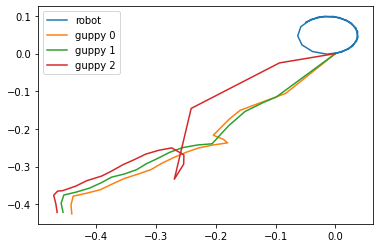

In [4]:
robot_positions = []
guppy_positions = []

robot_positions.append(env.robot.get_position())
guppy_positions.append([guppy.get_position() for guppy in env.guppies])


for i in range(20):
    # Pass an action for the agent to env.step
    observation, reward, done, info = env.step(action=np.float32([0.5, 0.05]))
    # You may not need any of the returned values.
    # Instead of reading poses from the observation, which is error prone,
    # read the poses directly.
    robot_positions.append(env.robot.get_position())
    guppy_positions.append([guppy.get_position() for guppy in env.guppies])
    # there is also `get_pose` and `get_orientation` if you need it

robot_positions = np.stack(robot_positions)

guppies = []
for i in range(num_guppies):
    guppies.append(np.stack([gp[i] for gp in guppy_positions]))

plt.plot(robot_positions[:, 0], robot_positions[:, 1], label="robot")
for i, guppy in enumerate(guppies):
    plt.plot(guppy[:, 0], guppy[:, 1], label=f"guppy {i}")
plt.legend();

# Without robot
- If you do not need a robot, you can set `robot_type = None`
- If you do this, pass `None` as action to `env.step`

In [5]:
env = robofish.gym_guppy.envs.ConfigurableGuppyEnv(robot_type=None)
env.step(action=None)

(array([[ 0.13797379, -0.25896972,  0.09451748]], dtype=float32),
 0.0,
 False,
 {})